# Implementation of Kernel PCA + SVM on indian Pines HSI

### Importing modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# !pip install seaborn
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split

In [2]:
# import hvplot
# import hvplot.pandas
# !pip install hvplot
pd.options.plotting.backend = 'hvplot'

### Reading the data

In [3]:
df = pd.read_csv('Dataset.csv')

In [4]:
df.head()

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [5]:
X = df.iloc[:, :-1].values

y = df.iloc[:, -1].values

In [6]:
X.shape, y.shape

((21025, 200), (21025,))

### Implementing Kernel PCA

In [7]:
kpca = KernelPCA(n_components = 150, kernel='poly', eigen_solver='arpack')

principalComponents = kpca.fit_transform(X)

principalComponents.shape

(21025, 150)

### Dividing the reduced data into _train_ and _test_

In [8]:
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(principalComponents, y,  range(X.shape[0]), 
                                                                                  test_size = 0.15, random_state = 11)

In [9]:
X_train.shape, X_test.shape

((17871, 150), (3154, 150))

### Implementing the Support Vector Machine(SVM) Classifier

Implementing the support vector machine classifier with _Radial Basis Function(RBF) kernel_.

In [22]:
svm = SVC(kernel='rbf', degree = 11, gamma='scale', cache_size=1024*7)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=7168, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=11, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
y_pred = svm.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}%')

Accuracy: 0.7079898541534559%


### Confusion Matrix

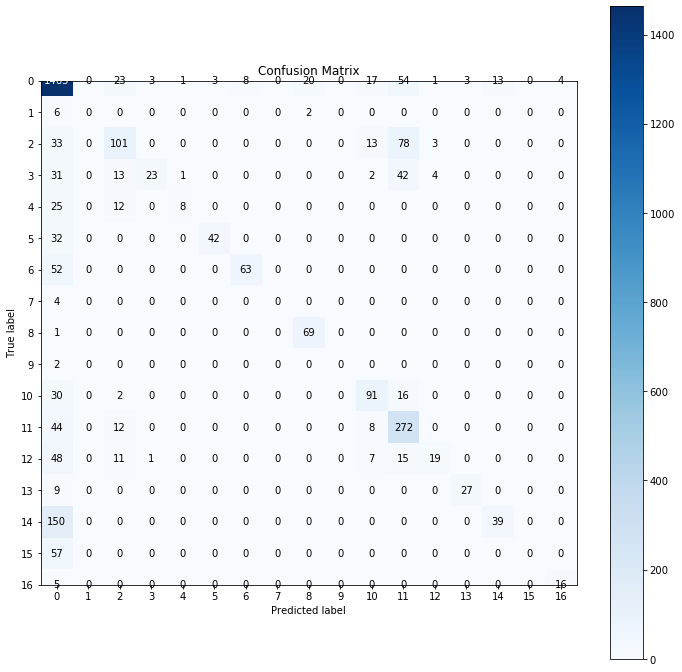

In [25]:
# ! pip install -q scikit-plot

import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(12,12));

In [29]:
# !pip install plotly
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z= confusion_matrix(y_test, y_pred),
                   x=[f'class-{i}' for i in np.unique(df.loc[:, 'class'].values)],
                   y=[f'class-{i}' for i in np.unique(df.loc[:, 'class'].values)],
                   hoverongaps = False))
fig.show()

### Classification Report

In [30]:
# print(confusion_matrix(y_test,y_pred))
print('Classification report:\n',classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.73      0.91      0.81      1613
           1       0.00      0.00      0.00         8
           2       0.58      0.44      0.50       228
           3       0.85      0.20      0.32       116
           4       0.80      0.18      0.29        45
           5       0.93      0.57      0.71        74
           6       0.89      0.55      0.68       115
           7       0.00      0.00      0.00         4
           8       0.76      0.99      0.86        70
           9       0.00      0.00      0.00         2
          10       0.66      0.65      0.66       139
          11       0.57      0.81      0.67       336
          12       0.70      0.19      0.30       101
          13       0.90      0.75      0.82        36
          14       0.75      0.21      0.32       189
          15       0.00      0.00      0.00        57
          16       0.80      0.76      0.78        21

  

#### Overall Accuracy: 70.79898541534559%%

### Classification Map

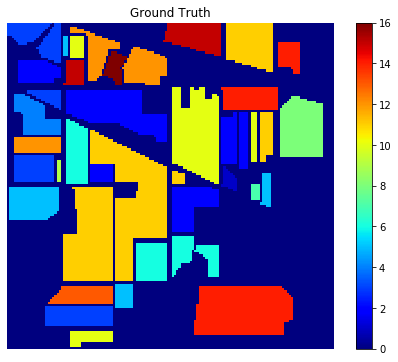

In [31]:
plt.figure(figsize=(8, 6))
plt.imshow(df.iloc[:, -1].values.reshape((145, 145)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
plt.savefig('ground_truth.png')
plt.show()

In [32]:
# !pip install tqdm
from tqdm import tqdm
pre = y_pred

clmap = [0]*X.shape[0]

for i in tqdm(range(len(indices_train))):
    clmap[indices_train[i]] = y[indices_train[i]]

for i in tqdm(range(len(indices_test))):
    clmap[indices_test[i]] = pre[i]

100%|██████████| 3154/3154 [00:00<00:00, 1314732.14it/s]


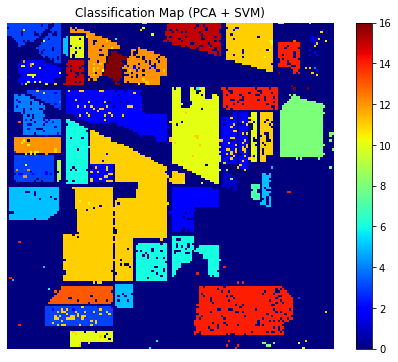

In [33]:
plt.figure(figsize=(8, 6))
plt.imshow(np.array(clmap).reshape((145, 145)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Classification Map (PCA + SVM)')
plt.savefig('Classification_map.png')
plt.show()

### Do Star if you like the repository